# 2DI70 Statistical Learning Theory 
## Assignment 1

### Group x
Name1 ID1

Name2 ID2

Name3 ID3

In [19]:
# Imports here
import pandas as pd
import matplotlib.pyplot as plt
from math import *
import numpy as np
import operator
from sklearn.decomposition import PCA


#### Load MNIST data from csv files

In [20]:
train_small = pd.read_csv("MNIST_train_small.csv").values
test_small  = pd.read_csv("MNIST_test_small.csv").values

In [21]:
## Normalizing the data is probably not necessary for this specific dataset
X_train_s = train_small[:, 1:]/255.0
y_train_s = train_small[:,0]

X_test_s = test_small[:, 1:]/255.0
y_test_s = test_small[:,0]

#### Define functions

145


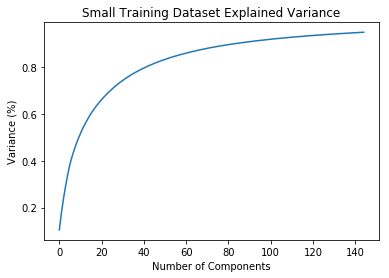

In [22]:
#Fitting the PCA algorithm with training dataset
pca = PCA(.95)
pca.fit(X_train_s)
print(pca.n_components_)
#Plotting the Cumulative Summation of the Explained Variance
plt.figure()
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('Number of Components')
plt.ylabel('Variance (%)') #for each component
plt.title('Small Training Dataset Explained Variance')
plt.show()

In [23]:
#The above plot and pca fitting tells us that selecting 145 components we can preserve something around 95% of the total variance
#of the data. It makes sense, we’ll not use 100% of our variance, because it denotes all components,
#and we want only the principal ones.
# With this information in our hands, we can implement the PCA for 145 best components by using this snippet of code:

PCA_X_train_s = pca.transform(X_train_s)


In [24]:
## Compute the nth root of given value
def n_root(val, p):   
    return val**(1 / float(p))
  
## Compute Minkowski distance for two given vectors
## Use p = 2 for Euclidian distance
def minkowski_dist(x1, x2, p):    
    p_sum = sum(pow(abs(a-b), p) for a, b in zip(x1, x2))
    return n_root(p_sum, p) 
  

In [25]:
## Compute p-minkowski distance from point to every datapoint in collection
## The list of labels should share length and indices with collection
def compute_dists(point, collection, labels, p):
    vals = []
    for i in range(len(collection)):
        d = minkowski_dist(point, collection[i], p)
        vals.append([i, d, labels[i]])
    
    return vals

#### Do KNN magic

In [ ]:
#1g. Using new dataset of PCA_X_train_s to reduce 784 dimensions on original X_train_s to 200 dimensions
#Apply the new dataset using pure k-nn, k = 20
#Predefine number of top k-nn, power p for Euclidean or Minkowski distance, length of training folds
k = 18
p = 2 
r = len(X_train_s)
error = 0

#for each point in train set of n values, compute the distance with all n-1 data points in training set (excluding the point selected)
# then sort in distance for top 20 nearest neighbors
for i in range(r):
    dists = compute_dists(PCA_X_train_s[i], PCA_X_train_s, y_train_s, p)
    dists_sorted = sorted(dists, key = lambda x: float(x[1]))
    list = dists_sorted[0:k] #get list top 20 nearest neighbors with its [index,distance,label] 
     
#count frequency of labels of the top 20 nearest neighbors:
    pred_class = {}
    for j in range(k):
        labels = list[j][-1]
        if labels in pred_class:
            pred_class[labels] += 1
        else:
            pred_class[labels] = 1
        #sort the most frequency labels at the beginning, return the prediction as the most frequency label at first position
    sortedVotes = sorted(pred_class.items(), key=operator.itemgetter(1), reverse=True) 
    if sortedVotes[0][0] != y_train_s[i]:
        error = error + 1
    print(sortedVotes[0][0],y_train_s[i],error)
print("total percentage of error" + str(error/r))

3 3 0
9 9 0
3 3 0
1 1 0
3 3 0
6 6 0
8 8 0
4 4 0
0 0 0
1 1 0
4 9 1
5 5 1
4 4 1
7 7 1
4 4 1
8 8 1
4 4 1
2 2 1
6 6 1
9 9 1
2 2 1
8 8 1
4 4 1
9 9 1
4 4 1
9 9 1
9 9 1
4 4 1
7 5 2
6 8 3
1 1 3
1 1 3
1 1 3
6 6 3
1 1 3
0 0 3
2 2 3
7 7 3
5 5 3
6 6 3
9 9 3
7 2 4
4 4 4
7 7 4
6 6 4
5 5 4
7 7 4
5 5 4
6 6 4
9 9 4
8 8 4
9 9 4
2 2 4
6 6 4
0 0 4
3 3 4
9 9 4
1 5 5
1 1 5
7 7 5
2 2 5
0 0 5
7 7 5
1 1 5
1 1 5
5 5 5
0 0 5
9 9 5
6 6 5
9 9 5
1 2 6
7 7 6
9 9 6
6 6 6
1 1 6
6 6 6
5 5 6
0 0 6
6 6 6
1 5 7
6 6 7
3 3 7
3 3 7
9 9 7
6 6 7
1 4 8
0 0 8
5 5 8
5 5 8
3 3 8
9 8 9
4 4 9
9 9 9
2 2 9
7 7 9
0 0 9
7 7 9
6 6 9
7 7 9
2 2 9
6 5 10
8 8 10
3 3 10
4 4 10
9 9 10
9 9 10
5 5 10
0 0 10
9 9 10
1 1 10
6 6 10
6 6 10
9 9 10
6 6 10
3 3 10
4 4 10
3 3 10
2 2 10
8 8 10
2 2 10
9 9 10
5 5 10
0 0 10
0 0 10
0 0 10
7 7 10
9 4 11
3 3 11
1 1 11
5 5 11
8 8 11
4 9 12
6 1 13
6 6 13
0 0 13
8 8 13
6 6 13
7 7 13
0 0 13
1 1 13
8 8 13
1 1 13
0 0 13
7 7 13
9 9 13
1 1 13
9 9 13
1 1 13
7 2 14
7 7 14
8 8 14
8 8 14
1 8 15
7 7 15
3 3 15
9 9 15
1 1 15
1

3 9 91
6 5 92
8 8 92
2 2 92
2 2 92
4 4 92
2 2 92
2 2 92
7 7 92
9 9 92
3 3 92
1 1 92
7 7 92
5 5 92
1 1 92
4 4 92
0 0 92
1 1 92
5 5 92
2 2 92
0 0 92
8 8 92
8 8 92
9 7 93
6 6 93
9 9 93
0 0 93
0 0 93
1 1 93
5 5 93
3 3 93
4 4 93
1 1 93
1 1 93
9 9 93
3 8 94
1 5 95
3 3 95
9 9 95
9 9 95
3 3 95
3 3 95
2 2 95
8 8 95
4 4 95
8 8 95
0 0 95
4 4 95
4 4 95
1 1 95
9 9 95
0 0 95
4 4 95
4 4 95
9 9 95
7 7 95
1 8 96
5 0 97
5 5 97
3 8 98
4 4 98
5 5 98
2 2 98
8 8 98
2 2 98
2 2 98
9 9 98
1 8 99
2 2 99
1 2 100
0 0 100
3 3 100
9 9 100
2 2 100
2 2 100
1 1 100
8 8 100
6 6 100
4 4 100
6 6 100
7 7 100
6 6 100
3 3 100
0 0 100
7 7 100
8 8 100
8 8 100
1 1 100
3 3 100
8 8 100
0 0 100
6 6 100
6 6 100
1 1 100
8 8 100
9 9 100
9 9 100
6 6 100
1 1 100
1 1 100
5 5 100
3 3 100
8 8 100
3 3 100
1 1 100
5 5 100
7 7 100
8 8 100
0 0 100
0 0 100
9 9 100
1 8 101
5 5 101
1 2 102
1 1 102
4 4 102
8 8 102
7 7 102
9 9 102
1 1 102
3 3 102
0 0 102
1 1 102
2 2 102
1 1 102
2 2 102
3 3 102
3 5 103
3 8 104
5 5 104
3 3 104
1 1 104
7 7 104
5 5 1

0 0 169
1 1 169
9 7 170
4 4 170
5 5 170
4 4 170
3 3 170
9 9 170
3 3 170
7 7 170
9 8 171
1 2 172
5 5 172
7 8 173
8 8 173
7 7 173
9 9 173
6 6 173
7 7 173
0 0 173
5 5 173
7 7 173
3 3 173
5 5 173
6 6 173
0 0 173
4 4 173
2 2 173
4 4 173
0 0 173
1 1 173
5 5 173
0 0 173
0 0 173
2 2 173
1 1 173
5 5 173
9 9 173
2 2 173
0 0 173
6 6 173
8 8 173
1 1 173
9 4 174
4 4 174
6 6 174
1 1 174
2 2 174
1 1 174
2 2 174
3 3 174
1 1 174
0 0 174
5 5 174
1 1 174
1 1 174
1 1 174
9 9 174
0 0 174
3 3 174
4 4 174
7 7 174
7 7 174
6 6 174
5 5 174
3 3 174
0 0 174
9 9 174
8 8 174
7 7 174
4 4 174
3 3 174
1 1 174
0 0 174
5 5 174
3 3 174
9 9 174
6 6 174
0 0 174
3 3 174
9 9 174
7 7 174
5 5 174
4 4 174
2 2 174
0 0 174
2 2 174
1 1 174
3 3 174
6 6 174
3 3 174
9 9 174
5 5 174
8 8 174
1 1 174
1 8 175
1 2 176
7 7 176
0 0 176
4 4 176
6 6 176
1 1 176
8 8 176
3 3 176
4 4 176
5 5 176
3 3 176
5 5 176
8 8 176
2 2 176
2 2 176
6 6 176
3 3 176
2 2 176
8 8 176
4 4 176
4 4 176
0 0 176
3 3 176
2 2 176
9 9 176
1 1 176
0 0 176
7 7 176
4 4 176
